**Building a model for stock prices** 

*Geometric Brownian (dt, ds)* :
- Stock prices generally follow the geometric Brownian motion
- Stock prices are continuous in terms of value and time
- over time, the stock price may randomly disperse

*Markov Process*: 
- A Markov process is a random process in which the future is independent of the past, given the present
- We only considered the current value of the stock prices, not the previous value
- Stock prices follow this process  

*Assumptions*:
- Stock prices are log-normaly distributed


Text(0.5, 1.0, 'Geometric Brownian Motion')

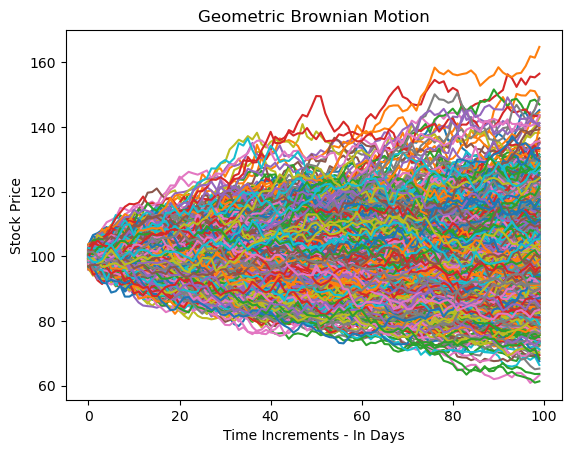

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt + sigma*np.sqrt(dt) * np.random.normal(size=(steps,N))),axis=0)
    
    # sigma*np.sqrt(dt) = deterministic part
    # np.random.normal(size=(steps,N)) = stochastic part
    
    return np.exp(ST)

S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.20 # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials

paths = geo_paths(S,T,r, q,sigma,steps,N)

plt.plot(paths);
plt.xlabel("Time Increments - In Days")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

In [16]:
from scipy.stats import norm

In [17]:
def black_scholes_call(S,K,T,r,q,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # call_price = value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    
    return call    

In [18]:
payoffs = np.maximum(paths[-1]-K, 0) # paths[-1] = stock prices for [steps = 100] (1000 prices)
option_price = np.mean(payoffs) * np.exp(-r*T) # discounting back to present value

bs_price = black_scholes_call(S,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")  

Black Scholes Price is 2.420858130241548
Simulated price is 2.4872817575857393


In [25]:
N=100000
paths= geo_paths(S, T, r, q,sigma, steps, N)
payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.exp(-r*T) * np.mean(payoffs)

bs_price = black_scholes_call(S,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")

Black Scholes Price is 2.420858130241548
Simulated price is 2.6159034221127495


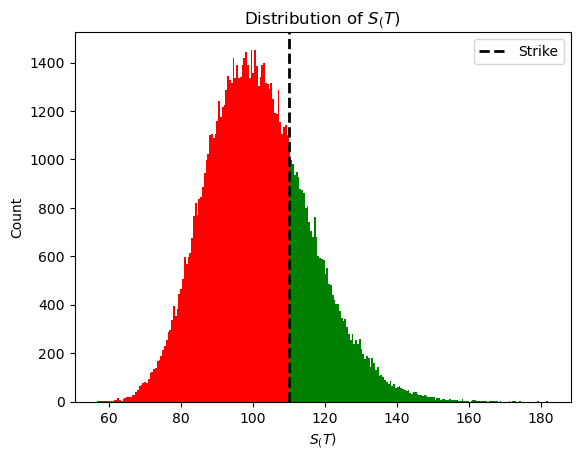

In [27]:
n, bins, patches = plt.hist(paths[-1],bins=250)
for c, p in zip(bins, patches):    
    
    if c > K: # call price > strike price
        
        plt.setp(p, 'facecolor', 'green') # call option
        
    else:
        plt.setp(p, 'facecolor', 'red') # put option
        
plt.axvline(K, color = 'black', linestyle = 'dashed', linewidth=2, label='Strike')
plt.title('Distribution of $S_(T)$')
plt.xlabel('$S_(T)$')
plt.ylabel('Count')
plt.legend()